In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from autoemulate.compare import AutoEmulate
from sklearn.metrics import r2_score

from autoemulate.experimental_design import LatinHypercube
from autoemulate.simulations.flow_functions import FlowProblem

show_progress = False if os.getenv("JUPYTER_BOOK_BUILD", "false").lower() == "true" else True

In [2]:
fp = FlowProblem(ncycles=10, ncomp=10, amp=900.)
fp.generate_pulse_function()

fp.solve()

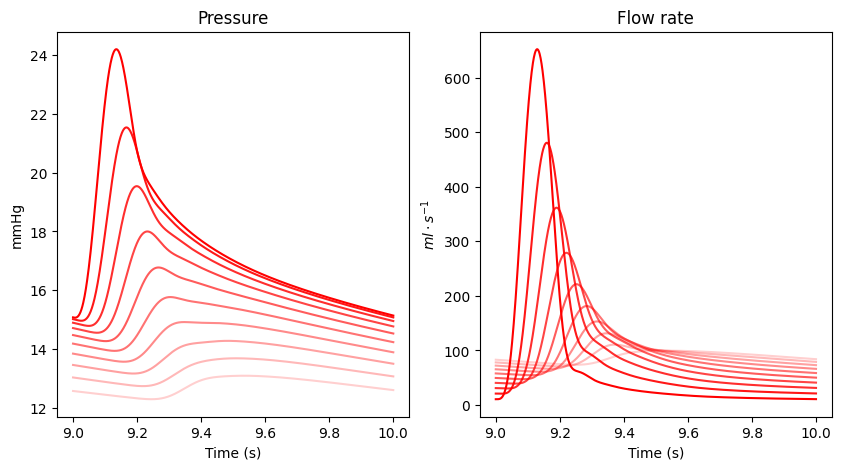

In [3]:
fig, ax = fp.plot_res()
plt.show()

In [4]:
## specify valid parameter ranges
# Dictionary with parameters and their scaled ranges for the blood flow model
parameters_range = {
    'T': tuple(np.array([0.5, 1.5]) * 1.0),  # Cardiac cycle period (s)
    'td': tuple(np.array([0.8, 1.2]) * 0.2),  # Pulse duration (s)
    'amp': tuple(np.array([0.8, 1.2]) * 900.0),  # Amplitude (e.g., pressure or flow rate)
    'dt': tuple(np.array([0.5, 1.5]) * 0.001),  # Time step (s)
    'C': tuple(np.array([0.8, 1.2]) * 38.0),  # Compliance (unit varies based on context)
    'R': tuple(np.array([0.8, 1.2]) * 0.06),  # Resistance (unit varies based on context)
    'L': tuple(np.array([0.8, 1.2]) * 0.0017),  # Inductance (unit varies based on context)
    'R_o': tuple(np.array([0.8, 1.2]) * 0.025),  # Outflow resistance (unit varies based on context)
    'p_o': tuple(np.array([0.9, 1.1]) * 10.0)  # Initial pressure (unit varies based on context)
}

# Output the dictionary for verification

parameters_range

{'T': (0.5, 1.5),
 'td': (0.16000000000000003, 0.24),
 'amp': (720.0, 1080.0),
 'dt': (0.0005, 0.0015),
 'C': (30.400000000000002, 45.6),
 'R': (0.048, 0.072),
 'L': (0.00136, 0.0020399999999999997),
 'R_o': (0.020000000000000004, 0.03),
 'p_o': (9.0, 11.0)}

In [5]:
## sample from parameter range

N_samples = 60
lhd = LatinHypercube(parameters_range.values())
sample_array = lhd.sample(N_samples)
sample_df    = pd.DataFrame(sample_array, columns=parameters_range.keys())  
print("Number of parameters", sample_df.shape[1], "Number of samples from each parameter", sample_df.shape[0])
sample_df.head()

Number of parameters 9 Number of samples from each parameter 60


,T,td,amp,dt,C,R,L,R_o,p_o
0,1.216351,0.212717,822.089949,0.000726,44.587063,0.064458,0.001691,0.022226,9.098914
1,1.149951,0.218158,982.181241,0.000998,37.185279,0.068706,0.001976,0.020703,10.829737
2,0.904722,0.166724,847.304545,0.001201,45.230935,0.057498,0.001647,0.026280,9.942606
3,0.849500,0.204070,725.506480,0.001157,44.920385,0.052644,0.001456,0.023333,10.178953
4,1.321653,0.227674,907.272983,0.000753,40.725863,0.062900,0.001405,0.024599,9.783949


In [6]:
# enforce parameter relations (eg td <= T)
sample_df['td'] = sample_df.apply(lambda row: row['td']* row['T'], axis=1)

In [7]:
sample_df

,T,td,amp,dt,C,R,L,R_o,p_o
0,1.216351,0.258739,822.089949,0.000726,44.587063,0.064458,0.001691,0.022226,9.098914
1,1.149951,0.250871,982.181241,0.000998,37.185279,0.068706,0.001976,0.020703,10.829737
2,0.904722,0.150839,847.304545,0.001201,45.230935,0.057498,0.001647,0.026280,9.942606
3,0.849500,0.173357,725.506480,0.001157,44.920385,0.052644,0.001456,0.023333,10.178953
4,1.321653,0.300906,907.272983,0.000753,40.725863,0.062900,0.001405,0.024599,9.783949
5,0.812372,0.191692,1060.015096,0.001306,38.605414,0.051635,0.001512,0.027206,10.736963
6,0.722797,0.136038,838.811944,0.000783,31.127471,0.051486,0.001708,0.029125,10.570763
7,1.396723,0.236323,863.001953,0.001241,43.810052,0.066388,0.001523,0.025787,10.425282
8,0.926726,0.163197,742.041167,0.000556,38.327899,0.061287,0.001413,0.026508,9.900279
9,0.791959,0.146749,1066.247771,0.001225,38.925249,0.067436,0.001721,0.028877,9.871568


In [8]:
# Fixed parameters: Number of compartments and cycles
ncomp = 10
ncycles = 10

# Function to run a simulation for a given set of parameters
def simulate(param_dict):
    fp = FlowProblem(ncycles=ncycles, ncomp=ncomp, **param_dict)
    fp.generate_pulse_function()
    fp.solve()
    return fp, fp.res.t, fp.res.y

Y = []
# Iterate over each sample of parameters
for index, row in tqdm(sample_df.iterrows(), total=len(sample_df), disable=show_progress):
    param_dict = row.to_dict() 
    fp, t, y = simulate(param_dict) 
    # extract peak pressure
    peak_pressure = y[:ncomp, :].max()
    Y.append(peak_pressure)

In [9]:
em = AutoEmulate()
parameter_names = list(parameters_range.keys())
em.setup(sample_df[parameter_names], Y, models = ['gp', 'svm','lgbm'])

,Values
Simulation input shape (X),"(60, 9)"
Simulation output shape (y),"(60,)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Scale output data (scale_output),True
Scaler output (scaler_output),StandardScaler
Do hyperparameter search (param_search),False
Reduce input dimensionality (reduce_dim),False
Reduce output dimensionality (reduce_dim_output),False


In [10]:
best_model = em.compare()

Cross-validating:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
em.summarise_cv()

,preprocessing,model,short,fold,rmse,r2
0,None,GaussianProcess,gp,2,5.336877,0.995375
1,None,GaussianProcess,gp,1,4.437543,0.994557
2,None,GaussianProcess,gp,4,6.913592,0.993842
3,None,GaussianProcess,gp,0,11.887020,0.975951
4,None,GaussianProcess,gp,3,20.833169,0.898089
5,None,SupportVectorMachines,svm,2,31.133851,0.842592
6,None,SupportVectorMachines,svm,1,23.973295,0.841146
7,None,SupportVectorMachines,svm,4,39.828038,0.795640
8,None,SupportVectorMachines,svm,3,35.767803,0.699603
9,None,SupportVectorMachines,svm,0,43.159782,0.682958


In [12]:
gp = em.get_model("GaussianProcess")
em.evaluate(gp)

,model,short,preprocessing,rmse,r2
0,GaussianProcess,gp,None,7.0284,0.9886


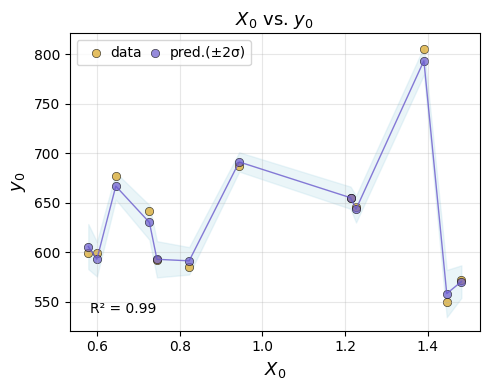

In [13]:
em.plot_eval(gp)

In [14]:
best_emulator = em.refit(gp)

In [15]:
# Extract parameter names and bounds from the dictionary
parameter_names = list(parameters_range.keys())
parameter_bounds = list(parameters_range.values())

# Define the problem dictionary for Sobol sensitivity analysis
problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': parameter_bounds
}

In [21]:
em.sensitivity_analysis(problem=problem)

,output,parameter,index,value,confidence
0,y1,T,S1,0.002558,0.000254
1,y1,td,S1,0.021101,0.002438
2,y1,amp,S1,0.889136,0.064112
3,y1,dt,S1,0.000380,0.000050
4,y1,C,S1,0.032391,0.003133
5,y1,R,S1,0.054625,0.004740
6,y1,L,S1,0.002954,0.000303
7,y1,R_o,S1,0.000269,0.000031
8,y1,p_o,S1,0.000456,0.000064
0,y1,T,ST,0.002039,0.004306
